In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

data = pd.read_csv('pip_dataset.csv')


In [2]:
# Display the first few rows of the DataFrame
data.head()

,country,year,reporting_level,welfare_type,ppp_version,survey_year,survey_comparability,headcount_ratio_international_povline,headcount_ratio_lower_mid_income_povline,headcount_ratio_upper_mid_income_povline,...,decile8_thr,decile9_thr,gini,mld,polarization,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
0,Albania,1996,national,consumption,2011,1996.0,0.0,0.920669,11.174149,44.618417,...,8.85,10.92,0.270103,0.119104,0.241293,0.928335,3.945872,3.568627,1.889273,1.888889
1,Albania,2002,national,consumption,2011,2002.0,1.0,1.570843,14.132118,49.669635,...,8.83,11.58,0.317390,0.164812,0.268982,1.215056,4.831625,3.979381,2.090253,1.903780
2,Albania,2005,national,consumption,2011,2005.0,1.0,0.860527,8.715685,38.545254,...,10.02,12.78,0.305957,0.154413,0.254529,1.142718,4.662236,3.872727,1.978328,1.957576
3,Albania,2008,national,consumption,2011,2008.0,1.0,0.313650,5.250542,31.110345,...,10.74,13.62,0.299847,0.148893,0.247311,1.114657,4.395911,3.574803,1.956897,1.826772
4,Albania,2012,national,consumption,2011,2012.0,1.0,0.849754,6.182414,34.528906,...,10.52,13.26,0.289605,0.138417,0.249988,1.041193,4.272573,3.632877,1.941435,1.871233


In [3]:
# Check the dimensions of the DataFrame (rows, columns)
data.shape

(4877, 108)

In [4]:
# Get statistical summary of the numerical columns
data.describe()

,year,ppp_version,survey_year,survey_comparability,headcount_ratio_international_povline,headcount_ratio_lower_mid_income_povline,headcount_ratio_upper_mid_income_povline,headcount_ratio_100,headcount_ratio_1000,headcount_ratio_2000,...,decile8_thr,decile9_thr,gini,mld,polarization,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
count,4877.000000,4877.000000,4411.000000,4411.000000,4877.000000,4877.000000,4877.000000,4877.000000,4877.000000,4877.000000,...,4877.000000,4877.000000,4401.000000,4401.000000,4401.000000,4395.000000,4395.000000,4877.000000,4877.000000,4877.000000
mean,2005.759893,2013.999385,2005.939896,1.639084,11.081565,21.672687,36.538818,3.164721,50.351520,69.105964,...,26.273736,35.110607,0.375645,0.264371,0.327385,1.886528,8.219764,7.424451,2.532256,2.660335
std,9.438782,3.000308,9.497211,1.402898,18.190433,27.104145,33.674140,7.568626,36.002943,34.132391,...,24.171141,30.671393,0.088840,0.140325,0.101136,1.138502,6.018946,42.891943,0.954387,11.785204
min,1967.000000,2011.000000,1967.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.920154,...,1.010000,1.460000,0.177920,0.053563,0.146643,0.596408,2.430173,2.191176,1.475248,1.485294
25%,2000.000000,2011.000000,2000.000000,1.000000,0.278387,0.807877,3.032081,0.044772,10.328433,44.575897,...,8.680000,11.960000,0.308719,0.163090,0.252448,1.154071,4.720943,3.937500,2.017751,1.942113
50%,2007.000000,2011.000000,2007.000000,1.000000,2.041412,9.186717,28.582685,0.371755,55.337658,84.916259,...,16.980000,24.560000,0.355622,0.220968,0.300364,1.465800,6.171947,5.149826,2.290076,2.207904
75%,2013.000000,2017.000000,2014.000000,2.000000,13.390963,34.166712,64.864719,2.158480,85.133887,97.179433,...,35.550000,48.350000,0.427676,0.320859,0.380201,2.152142,9.043292,7.458333,2.780911,2.740385
max,2021.000000,2017.000000,2021.000000,6.000000,96.871427,99.999000,99.999000,79.532619,99.999000,100.000000,...,120.100000,164.700000,0.657556,0.937047,0.815704,8.343586,72.681737,2892.000000,11.491525,809.000000


In [5]:
# Get information about the DataFrame, including column names and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4877 entries, 0 to 4876
Columns: 108 entries, country to p50_p10_ratio
dtypes: float64(103), int64(2), object(3)
memory usage: 4.0+ MB


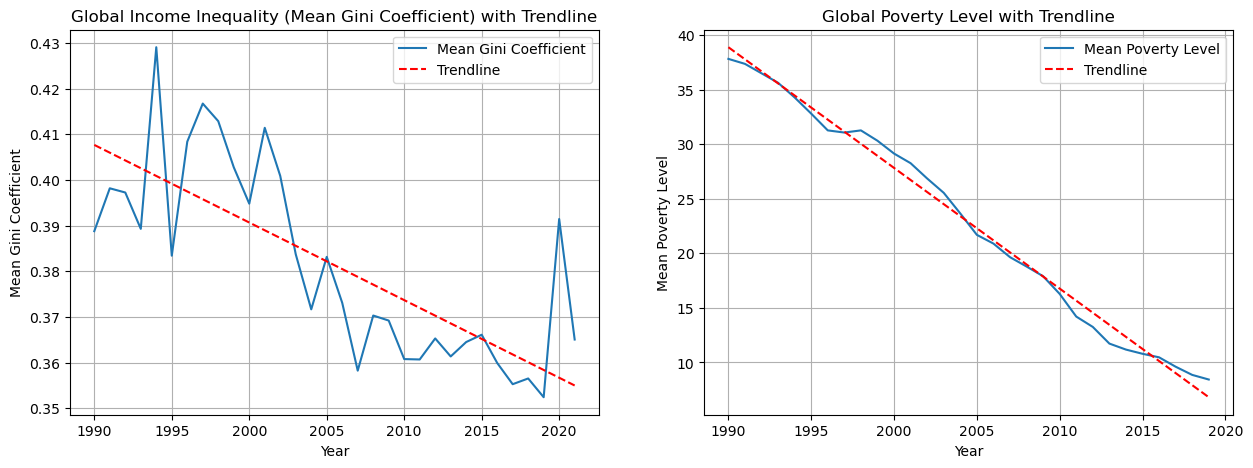

In [6]:
# Filter the data to only include years from 1990 onwards and data from the 2017 version
data_1990_onwards = data[(data['year'] >= 1990) & (data['ppp_version'] == 2017)]

## Further filter the data to specify the individual country data vs the world data
data_countries = data_1990_onwards[data_1990_onwards['country'] != 'World']
data_world = data_1990_onwards[data_1990_onwards['country'] == 'World']

# Data processing code
mean_gini_by_year = data_countries.groupby('year')['gini'].mean().reset_index()
mean_poverty_by_year = data_world.groupby('year')['headcount_ratio_international_povline'].mean().reset_index()

# Create a 1x3 layout for the subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# fig.subplots_adjust(wspace=0.25)  # Add a margin between subplots

# Define a helper function to fit and plot a trendline
def plot_trendline(x, y, ax, title):
    X = x.values.reshape(-1, 1)
    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)
    ax.plot(x, y, label=title)
    ax.plot(x, y_pred, color='red', linestyle='--', label='Trendline')

# Plot the Mean Gini Coefficient chart on the second subplot
plot_trendline(mean_gini_by_year['year'], mean_gini_by_year['gini'], axes[0], 'Mean Gini Coefficient')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Mean Gini Coefficient')
axes[0].set_title('Global Income Inequality (Mean Gini Coefficient) with Trendline')
axes[0].legend()
axes[0].grid(True)

# Plot the Mean Poverty Level chart for the world data on the third subplot
plot_trendline(mean_poverty_by_year['year'], mean_poverty_by_year['headcount_ratio_international_povline'], axes[1], 'Mean Poverty Level')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Mean Poverty Level')
axes[1].set_title('Global Poverty Level with Trendline')
axes[1].legend()
axes[1].grid(True)

# Display the charts
plt.show()


In [7]:
# Filter the country data for first and the last year (Gini coefficients are only available on the country level)
data_1990_last = data_1990_onwards[(data_1990_onwards['year'] == data_1990_onwards['year'].min()) | (data_1990_onwards['year'] == data_1990_onwards['year'].max())]

# Calculate the mean Gini coefficient for both years
gini_by_year = data_1990_last.groupby('year')['gini'].mean().reset_index()

# Filter the world data for first and the last year
data_1990_last = data_world[(data_world['year'] == data_world['year'].min()) | (data_world['year'] == data_world['year'].max())]

# Calculate the global mean poverty level (headcount_ratio_international_povline)
mean_poverty_by_year = data_1990_last.groupby('year')['headcount_ratio_international_povline'].mean().reset_index()

# Set index with labels for the Gini dataframe
gini_by_year.index = ['First Year', 'Last Year']
gini_by_year.index.name = 'Year'

# Set index with labels for the Poverty dataframe
mean_poverty_by_year.index = ['First Year', 'Last Year']
mean_poverty_by_year.index.name = 'Year'

# Display the dataframes with labels
print("Mean Gini Coefficient:")
print(gini_by_year)
print("\nMean Poverty Level:")
print(mean_poverty_by_year)


Mean Gini Coefficient:
            year      gini
Year                      
First Year  1990  0.388770
Last Year   2021  0.365042

Mean Poverty Level:
            year  headcount_ratio_international_povline
Year                                                   
First Year  1990                              37.806892
Last Year   2019                               8.435035
